## Model Evaluation (model v01)

#### Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
from joblib import dump, load

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import mean_absolute_error, mean_squared_error from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load model_fit file

In [3]:
input_dir = os.path.join('..', 'data', 'processed', 'model_v1')
plots_dir = os.path.join('..', 'data', 'figures', 'model_v1')
lin_model = load(os.path.join(input_dir, 'lin_model_3.joblib'))
rf_model = load(os.path.join(input_dir, 'forest_model_1.joblib'))
nnet_model = load(os.path.join(input_dir, 'neural_model_1.joblib'))

#### Load in test and train data

In [4]:
X_train = pd.read_csv(os.path.join(input_dir, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(input_dir, 'X_test.csv'))
y_train = np.array(pd.read_csv(os.path.join(input_dir, 'y_train.csv'))['target'])
y_test = np.array(pd.read_csv(os.path.join(input_dir, 'y_test.csv'))['target'])

In [5]:
X_train = X_train.rename(columns={
    'c10_other_wires': 'c10a',
    'c10_restructured': 'c10b',
    'c10_vert_int': 'c10c',
    
})
X_test = X_test.rename(columns={
    'c10_other_wires': 'c10a',
    'c10_restructured': 'c10b',
    'c10_vert_int': 'c10c',
    
})

#### Predict on test set using trained models

In [6]:
y_pred_lin = lin_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nnet = nnet_model.predict(X_test)

/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c10a
- c10b
- c10c
Feature names seen at fit time, yet now missing:
- c10_other_wires
- c10_restructured
- c10_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c10a
- c10b
- c10c
Feature names seen at fit time, yet now missing:
- c10_other_wires
- c10_restructured
- c10_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Featur

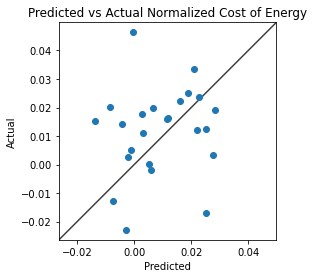

In [7]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})

fig, ax = plt.subplots()
ax.scatter(y_pred_lin, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted vs Actual Normalized Cost of Energy')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'lm_actual_vs_pred_scatter.png'), dpi=300)

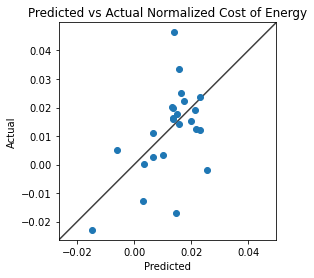

In [8]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

fig, ax = plt.subplots()
ax.scatter(y_pred_rf, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted vs Actual Normalized Cost of Energy')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'rf_actual_vs_pred_scatter.png'), dpi=300)

#### Compute fit statistics

(a) Bias := $\sum (\hat{y_i} - y_i) $

In [9]:
bias_lin = sum(y_pred_lin - y_test)
bias_rf = sum(y_pred_rf - y_test)

print("Bias of Linear Regression: {}".format(bias_lin))
print("Bias of Random Forest: {}".format(bias_rf))

Bias of Linear Regression: -0.06810167722766496
Bias of Random Forest: 0.024279481805081007


(b) Mean Absolute Error := $\frac{1}{n} \sum |\hat{y_i} - y_i|$

In [10]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("MAE of Linear Regression: {}".format(mae_lin))
print("MAE of Random Forest Model: {}".format(mae_rf))

MAE of Linear Regression: 0.014207363884699967
MAE of Random Forest Model: 0.009469219653565333


(c) Root Mean Square Error := $\sqrt{\frac{1}{n} \sum (\hat{y_i} - y_i)^2}$

In [11]:
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RMSE of Linear Regression: {}".format(rmse_lin))
print("RMSE of Random Forest: {}".format(rmse_rf))

RMSE of Linear Regression: 0.018493816505743034
RMSE of Random Forest: 0.013071057253071674


(d) R squared := $1 - \frac{RSS}{TSS}$ := $1- \frac{\sum (\hat{y_i}-y_i)^2}{\sum (y_i - \mu)^2}$

In [12]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)

print("R^2 of Linear Regression: {}".format(r2_lin))
print("R^2 of Random Forest: {}".format(r2_rf))

R^2 of Linear Regression: -0.4797260516462556
R^2 of Random Forest: 0.26082092319859485


[0.30062526 0.02746705 0.22348862 0.10843147 0.05933366 0.1028969
 0.0864483  0.02783408 0.04170127 0.01547497 0.00285231 0.00344612]


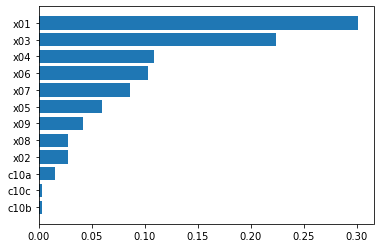

In [14]:
print(rf_model.feature_importances_)
variable_importance_df = pd.DataFrame({ # removed x09 for performance
    'variable': np.array(['x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'x09', 'c10a', 'c10b', 'c10c']),
    'values': rf_model.feature_importances_,
})
variable_importance_df = variable_importance_df.sort_values(by=['values'])
plt.barh(variable_importance_df['variable'], variable_importance_df['values'])
plt.savefig(os.path.join(plots_dir, 'rf_variable_importance_plot.png'), dpi=300)

#### Coefficient value estimates, p-values and std error for each feature variable

In [15]:
results = pd.DataFrame({
    'variables': X_train.columns,
    'coeff': lin_model.coef_,
})
results

,variables,coeff
0,x01,-0.016512
1,x02,0.000598
2,x03,-0.001011
3,x04,-0.002824
4,x05,-0.001443
5,x06,-0.001483
6,x07,0.002490
7,x08,-0.003570
8,x09,-0.003843
9,c10a,0.013920


Train fit analysis from OLS statsmodel package

In [16]:
import statsmodels.api as sm

In [17]:
X2_train = sm.add_constant(X_train)
ols_result = sm.OLS(y_train, X2_train).fit()
ols_result.summary()

/home/julian/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3.794
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           0.000147
Time:                        21:03:02   Log-Likelihood:                 236.84
No. Observations:                  92   AIC:                            -447.7
Df Residuals:                      79   BIC:                            -414.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.036      0.076      0.939      -0.069       0.074
x01           -0.0165      0.004     -4.688      0.000      -0.024      -0.010
x02            0.0006      0.003      0.227      0.821      -0.005       0.006
x03           -0.0010      0.003     -0.396      0.693      -0.006       0.004
x04           -0.0028      0.002     -1.294      0.200      -0.007       0.002
x05           -0.0014      0.002     -0.594      0.554      -0.006       0.003
x06           -0.0015      0.003     -0.533      0.596      -0.007       0.004
x07            0.0025      0.002      1.111      0.270      -0.002       0.007
x08           -0.0036      0.003     -1.156      0.251      -0.010       0.003
x09           -0.0038      0.003     -1.115      0.268      -0.011       0.003
c10a           0.0139      0.036      0.383      0.703      -0.058       0.086
c10b           0.0282      0.037      0.757      0.452      -0.046       0.102
c10c           0.0038      0.036      0.106      0.916      -0.068       0.076
==============================================================================
Omnibus:                       21.262   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.855
Skew:                           0.725   Prob(JB):                     4.51e-13
Kurtosis:                       6.568   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Partial dependence plots